In [84]:
%matplotlib notebook

In [23]:
import os.path
from lib import filedb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [4]:
basedir = "../datasets/LSM780_63x_spoiid_v_sigb/"
file_df = filedb.get_filedb(os.path.join(basedir, "filedb.tsv"))
cell_df = pd.read_hdf(basedir + "rsiga_ysigb_cspoiid_redoedgedata.h5", "cells")
# Ignore first 2 um (only done for consistency)
cell_df = cell_df[cell_df["distance"] > 2].copy()


In [6]:
from figures.figure_allspore_2xqp_combo import subfig_spoiid_vs_sigb_raw_cor

Int64Index([2, 3], dtype='int64', name='file_id')
Cell N: 372689
orig pad  =  4.0


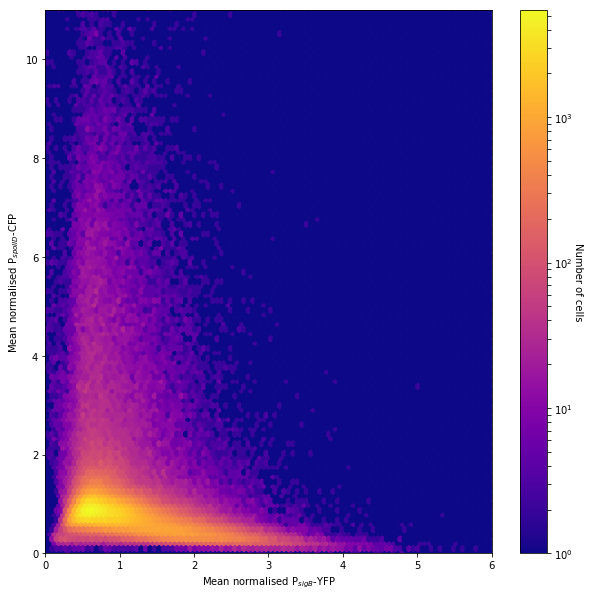

In [8]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
corr_ax = ax
corr_ax, corr_cb = subfig_spoiid_vs_sigb_raw_cor.get_figure(corr_ax, file_df, cell_df)
#corr_ax, corr_cb, cont_cb = subfig_spoiid_vs_sigb_isolines.get_figure(corr_ax, file_df, cell_df)
cbar = fig.colorbar(corr_cb, ax=corr_ax)
#cbar.add_lines()#corr_cb)
cbar.ax.set_ylabel('Number of cells', rotation=270) 
print("orig pad  = ", cbar.ax.yaxis.labelpad)
cbar.ax.yaxis.labelpad = 10

In [14]:
mixed_df = cell_df.copy()

In [18]:
random_df = cell_df.sample(len(cell_df)).copy()
random_df2 = cell_df.sample(len(cell_df)).copy()

mixed_df["meannorm_green"] = random_df["meannorm_green"].values
mixed_df["meannorm_blue"] = random_df2["meannorm_blue"].values

Int64Index([2, 3], dtype='int64', name='file_id')
Cell N: 372689
orig pad  =  4.0


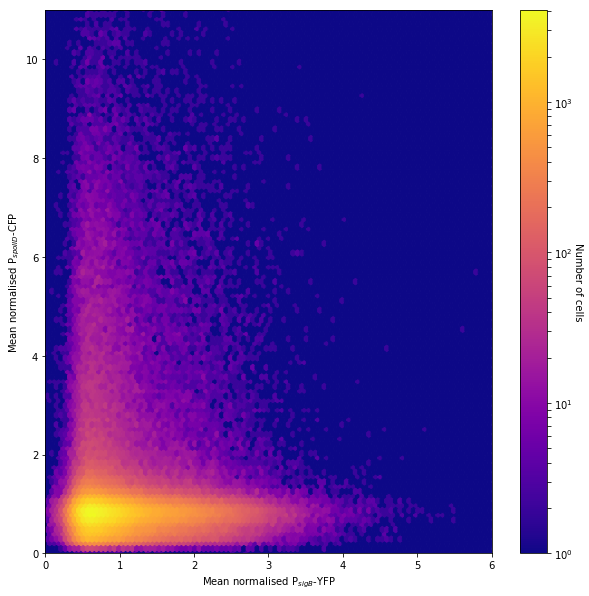

In [19]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
corr_ax = ax
corr_ax, corr_cb = subfig_spoiid_vs_sigb_raw_cor.get_figure(corr_ax, file_df, mixed_df)
#corr_ax, corr_cb, cont_cb = subfig_spoiid_vs_sigb_isolines.get_figure(corr_ax, file_df, cell_df)
cbar = fig.colorbar(corr_cb, ax=corr_ax)
#cbar.add_lines()#corr_cb)
cbar.ax.set_ylabel('Number of cells', rotation=270) 
print("orig pad  = ", cbar.ax.yaxis.labelpad)
cbar.ax.yaxis.labelpad = 10

In [20]:
cell_df.columns

Index(['image_row', 'image_col', 'distance', 'slice_row', 'slice_col',
       'segment_label', 'mean_red', 'std_red', 'mean_green', 'std_green',
       'mean_blue', 'std_blue', 'meannorm_red', 'meannorm_green',
       'meannorm_blue', 'area', 'perimeter', 'eccentricity', 'global_file_id',
       'slice'],
      dtype='object')

In [ ]:
celldf.

In [ ]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
corr_ax = ax
corr_ax, corr_cb = subfig_spoiid_vs_sigb_raw_cor.get_figure(corr_ax, file_df, cell_df)
#corr_ax, corr_cb, cont_cb = subfig_spoiid_vs_sigb_isolines.get_figure(corr_ax, file_df, cell_df)
cbar = fig.colorbar(corr_cb, ax=corr_ax)
#cbar.add_lines()#corr_cb)
cbar.ax.set_ylabel('Number of cells', rotation=270) 
print("orig pad  = ", cbar.ax.yaxis.labelpad)
cbar.ax.yaxis.labelpad = 10

In [21]:
file_df

,path,name,dirname,time,location,strain
file_id,,,,,,
0,data/fp3_unmixing,JLB124_24hrs_center_63x_tile_unmixing,rsiga_ysigb_cspoiid,24,center,JLB124
1,data/fp3_unmixing,JLB124_24hrs_edge_63x_tile_unmixing,rsiga_ysigb_cspoiid,24,edge,JLB124
2,data/fp3_unmixing,JLB124_48hrs_center_63x_tilescan_unmixing,rsiga_ysigb_cspoiid,48,center,JLB124
3,data/fp3_unmixing,JLB124_48hrs_center_tile_scan_unmixing,rsiga_ysigb_cspoiid,48,center,JLB124
4,data/fp3_unmixing,JLB124_48hrs_edge_63x_tilescan_unmixing,rsiga_ysigb_cspoiid,48,edge,JLB124
5,data/fp3_unmixing,JLB124_48hrs_edge_tile_scan_unmixing,rsiga_ysigb_cspoiid,48,edge,JLB124
6,data/fp3_unmixing,JLB124_72hrs_center_63x_tilescan_unmixing,rsiga_ysigb_cspoiid,72,center,JLB124
7,data/fp3_unmixing,JLB124_72hrs_edge_63x_tilescan_unmixing,rsiga_ysigb_cspoiid,72,edge,JLB124


Int64Index([2, 3], dtype='int64', name='file_id')
Cell N: 214187


Text(0,0.5,'Mean normalised P$_{spoIID}$-CFP')

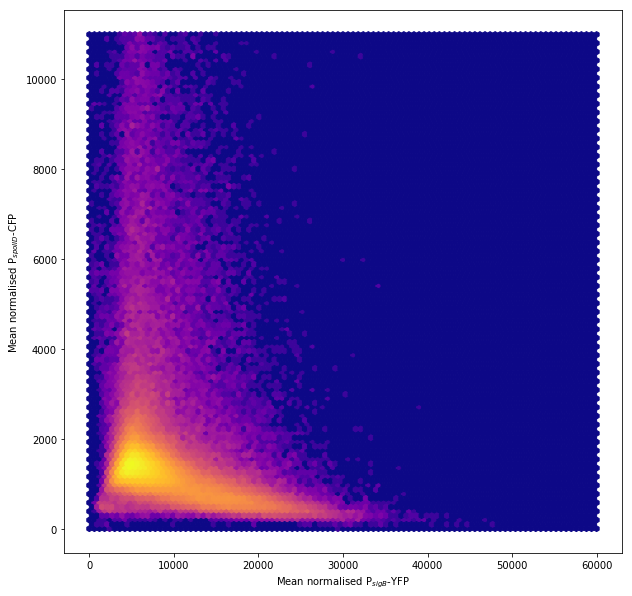

In [39]:
time = 48
location = "center"
fids = file_df[(file_df["time"] == time) & (file_df["location"] == location)].index
print(fids)
fids = [2]

    #timsct = cell_df[cell_df["global_file_id"].isin(fids)]
red_chan = "meannorm_red"
blu_chan = "meannorm_blue"
grn_chan = "meannorm_green"
red_chan = "mean_red"
blu_chan = "mean_blue"
grn_chan = "mean_green"

timsct = cell_df[cell_df["global_file_id"].isin(fids)]

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
gs = 100
cfpmax = 11000 
yfpmax = 60000 
kwargs = {"gridsize":gs, 
            #"marginals":True, 
            "extent":[0, yfpmax, 0, cfpmax], 
            #"bins": "log"
            "norm": matplotlib.colors.LogNorm(), 
            "cmap": plt.get_cmap("plasma")
        }
# ax[0].hexbin(timsct[red_chan], timsct[blu_chan], **kwargs)
# ax[0].set_title("RFP-σA vs CFP-spoiid")
# ax[0].set_ylabel("CFP")
# ax[0].set_xlabel("RFP")
# #ax[0].colorbar()
# ax[1].hexbin(timsct[red_chan], timsct[grn_chan], **kwargs) 
# ax[1].set_title("RFP-σA vs YFP-σB")
# ax[1].set_ylabel("RFP")
# ax[1].set_xlabel("YFP")
print("Cell N:", len(timsct) )
hb = ax.hexbin(timsct[grn_chan], timsct[blu_chan], **kwargs)
#ax.set_title("vs PsigB-YFP")
ax.set_xlabel("Mean normalised P$_{sigB}$-YFP")
ax.set_ylabel("Mean normalised P$_{spoIID}$-CFP")


(1, 30000.0)

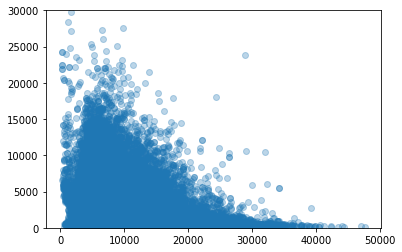

In [51]:
fig, ax = plt.subplots(1,1)
sortedgrn = timsct#.sort_values(by="mean_green")

ax.scatter(sortedgrn["mean_green"],sortedgrn["mean_blue"], alpha=0.3)
# ax.set_xscale("log", nonposx='clip')
ax.set_ylim(1, 3e4)
#ax.set_yscale("log", nonposy='clip')

In [54]:
green_bins = np.linspace(0, 50000, 100)
green_x = green_bins[1:] - (green_bins[1] - green_bins[0])

<IPython.core.display.Javascript object>


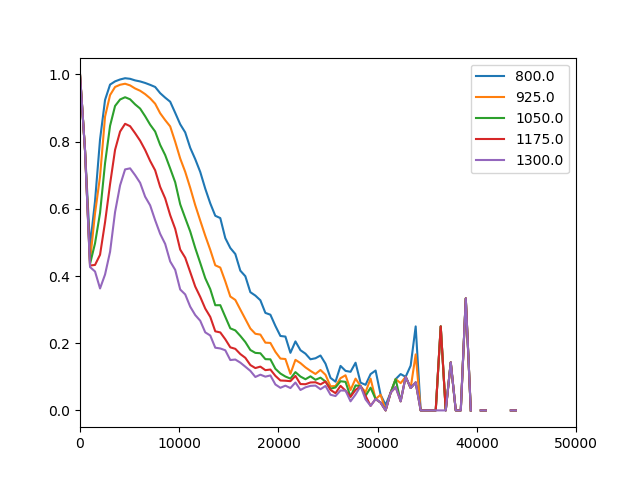

In [90]:
#cfp_thresh = 3000
for cfp_thresh in np.linspace(0.8e3, 1.3e3,5):
    fids = [2]
    timsct = cell_df[cell_df["global_file_id"].isin(fids)].copy()
    timsct["one"] = 1
    timsct["gthn"] = (timsct["mean_blue"] > cfp_thresh).values
    counts = timsct.groupby(pd.cut(timsct["mean_green"], green_bins)).sum()
    plt.plot(green_x, counts["gthn"]/counts["one"], label=str(cfp_thresh))
plt.xlim(green_bins[0], green_bins[-1])
plt.legend()

(0.0, 50000.0)

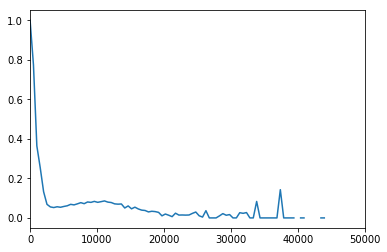

In [69]:
counts["mean_green"]

mean_green
(0.0, 1020.408]           9.328341e+04
(1020.408, 2040.816]      9.654906e+05
(2040.816, 3061.224]      8.771240e+06
(3061.224, 4081.633]      5.694163e+07
(4081.633, 5102.041]      1.505925e+08
(5102.041, 6122.449]      1.952278e+08
(6122.449, 7142.857]      1.802133e+08
(7142.857, 8163.265]      1.554683e+08
(8163.265, 9183.673]      1.284762e+08
(9183.673, 10204.082]     1.058646e+08
(10204.082, 11224.49]     8.569850e+07
(11224.49, 12244.898]     7.718972e+07
(12244.898, 13265.306]    7.390133e+07
(13265.306, 14285.714]    6.969305e+07
(14285.714, 15306.122]    6.963340e+07
(15306.122, 16326.531]    6.652284e+07
(16326.531, 17346.939]    6.371285e+07
(17346.939, 18367.347]    5.605341e+07
(18367.347, 19387.755]    5.278258e+07
(19387.755, 20408.163]    4.301419e+07
(20408.163, 21428.571]    3.802789e+07
(21428.571, 22448.98]     3.115347e+07
(22448.98, 23469.388]     2.576741e+07
(23469.388, 24489.796]    1.987806e+07
(24489.796, 25510.204]    1.541413e+07
(25510.204, 26